# Why videogames?

The gaming industry is bigger than the movie and music industries combined. That sentence should already grasp the attention of most people and show why videogames are of interest for business. That being said, videogames are also a passion of mine and I thought that this combination of factors meant that doing my first data analysis project about the gaming industry was a good starting point.

The dataset used in this project was obtained from Kaggle and can be accessed through https://www.kaggle.com/gregorut/videogamesales .

# Importing Data

In [12]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

#Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

In [13]:
vgdata = pd.read_csv('vgsales.csv')
vgdata.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Data Description

This dataset contains a list of videogames that sold more than 100,000 copies and is it's columns include

* **Rank** - Ranking of overall sales, integer
* **Name** - The game's name, object
* **Platform** - The platform which it was released for (i.e. Wii, PS4, etc), objetct
* **Year** - Year of game's release, float
* **Genre** - The game's genre, object
* **Publisher** - Name of the company that published the game, object
* **NA_Sales** - Number of copies the game sold in North America (in millions), float
* **EU_Sales** - Number of copies the game sold in Europe (in millions), float
* **JP_Sales** - Number of copies the game sold in Japan (in millions),float
* **Other_Sales** - Number of copies the game sold in other regions (in millions), float
* **Global_Sales** - Number of copies the game sold worldwide (in millions), float.

In [15]:
print('Database dimension: {}'.format(vgdata.shape))
print('Database size: {}'.format(vgdata.size))

Database dimension: (16598, 11)
Database size: 182578


Now that we've sucessfully characterized the dataset it is time to clean it. As we can see from the DataFrame info we have issues on both the "Year" and "Publisher" columns, which have null values.

# Data Cleaning

In [16]:
# Creates a DataFrame with the percentage of null values
null_vgd_perc = pd.DataFrame((vgdata.isnull().sum())*100/vgdata.shape[0]).reset_index()
null_vgd_perc.columns = ['Column Name', 'Null Values Percentage']

# Creates a DataFrame with the count of null values
null_vgd_count = pd.DataFrame((vgdata.isnull().sum())).reset_index()
null_vgd_count.columns = ['Column Name', 'Null Values']

# Merges both DataFrames in order to have both the count and the percentage of null values
null_vgd = pd.merge(null_vgd_perc, null_vgd_count, on = 'Column Name')

# Final DataFrame shown with the Columns of interest, "Year" and "Publisher"
null_vgd.iloc[[3, 5]]

,Column Name,Null Values Percentage,Null Values
3,Year,1.632727,271
5,Publisher,0.349440,58


As expected, we have 1.63% of the "Year" column with missing data and 0.35% of the "Publisher" column with missing data. This percentages are not something that should get in the way of our analysis, so I'm just going to drop these null values.

In [6]:
vgdata = vgdata.dropna()
vgdata.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

It is worth noting that this dataset was last updated in 2017, hence we shouldn't expect any game released after this year. Let's see what is the maximum year contained in the dataset.

In [7]:
print('Max Year Value: {}'.format(vgdata['Year'].max()))

Max Year Value: 2020.0


We should go after the game that had it's release year wrongly inputted in the dataset and correct it.

In [17]:
max_index = vgdata['Year'].idxmax()
vgdata.iloc[max_index]

Rank                              5959
Name            Imagine: Makeup Artist
Platform                            DS
Year                              2020
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5957, dtype: object

After googling the game's name, I found out that it's release year is actually 2009. We should replace that information in the dataset.

In [9]:
vgdata['Year'] = vgdata['Year'].replace(2020.0, 2009.0)
print('Max Year Value: {}'.format(vgdata['Year'].max()))

Max Year Value: 2017.0


Nice. The data preparation is done. It is now time for us to engage in the analysis.

# Data Analysis and Visualization

In [10]:
games = vgdata['Name'].nunique()
publisher = vgdata['Publisher'].nunique()
platforms = vgdata['Platform'].nunique()
genres = vgdata['Genre'].nunique()

print('We have a total of {ga} games, {pu} publishers, {pl} platforms and {ge} genres.'.format(ga = games, pu = publisher, pl = platforms, ge=genres))

We have a total of 11325 games, 576 publishers, 31 platforms and 12 genres.


One of the first things that comes to mind when analyzing this dataset is how did videogame production change throughout the years.

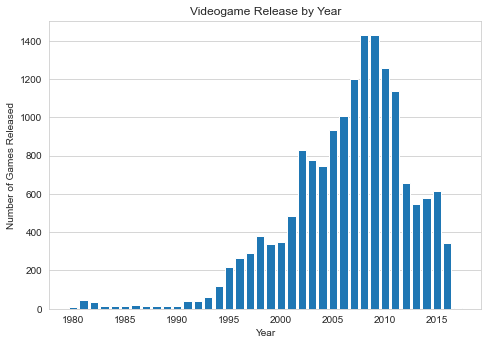

In [11]:
games_per_year =  vgdata.groupby('Year')['Name'].count().reset_index()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(games_per_year['Year'].tolist(), games_per_year['Name'].tolist())
ax.set_ylabel('Number of Games Released')
ax.set_xlabel('Year')
ax.set_title('Videogame Release by Year')
ax.xaxis.grid(False)

We can see that game production peaked during 2007 until 2010, which is something that particularly surprised me, given the fact that the popularity of this media only grows as time passes, which got me wondering, even though the amount of games released peaked in this interval, what happened to the global sales?

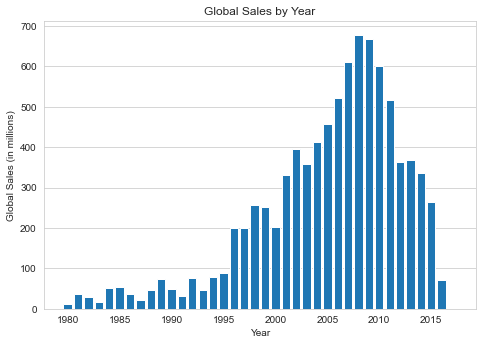

In [12]:
sales_per_year = vgdata.groupby('Year')['Global_Sales'].sum().reset_index()
sales_per_year

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(sales_per_year['Year'].tolist(), sales_per_year['Global_Sales'].tolist())
ax.set_ylabel('Global Sales (in millions)')
ax.set_xlabel('Year')
ax.set_title('Global Sales by Year')
ax.xaxis.grid(False)


No surprises, the global sales follows roughly the same pattern. Another evolution that might peak our interest is how many games did each publisher release, and we should compare this with the global sales of each company.

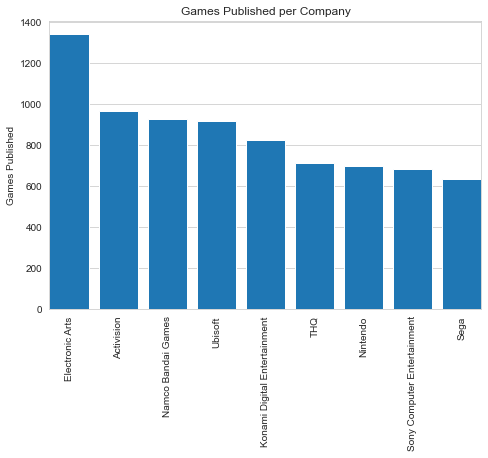

In [13]:
game_per_pub = vgdata.groupby('Publisher')['Name'].count().reset_index()

game_per_pub = game_per_pub.sort_values('Name', ascending = False)

game_per_pub.drop(game_per_pub[game_per_pub['Name'] <= 500].index, inplace=True)
game_per_pub

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(game_per_pub['Publisher'].tolist(), game_per_pub['Name'].tolist())

ax.set_ylabel('Games Published')

ax.set_title('Games Published per Company')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.margins(x=0)
ax.xaxis.grid(False)

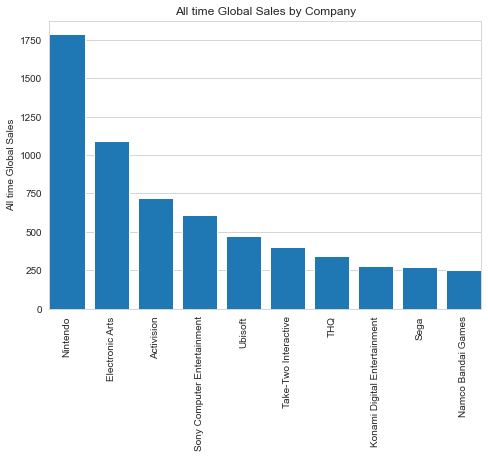

In [14]:
sale_per_pub = vgdata.groupby('Publisher')['Global_Sales'].sum().reset_index()

sale_per_pub = sale_per_pub.sort_values('Global_Sales', ascending = False)

sale_per_pub.drop(sale_per_pub[sale_per_pub['Global_Sales'] <= 250].index, inplace=True)

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.bar(sale_per_pub['Publisher'].tolist(), sale_per_pub['Global_Sales'].tolist())

ax.set_ylabel('All time Global Sales')

ax.set_title('All time Global Sales by Company')

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.margins(x=0)
ax.xaxis.grid(False)

We notice that even though Nintendo is not the first Company in terms of publishing, it is, by far, the company that has most overall revenue. The reason behind this may be historic, Nintendo created the most influential and famous videogame franchises of all time: Mario and The Legend of Zelda. The biggest entertainment industry on the planet was born out of these franchises, hence the income of the visionary company that conceived these characters.